## Assignment: Центральная предельная теорема своими руками
### by Egor Makhov. Coursera 2016 

---
*Instructions*

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

Для нескольких значений n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения.

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

---

**Решение:**

In [1]:
# подключим все необходимые модули и пропишим мэджики
%matplotlib inline

import numpy as np
from scipy.stats import chi2, norm
import matplotlib.pyplot as plt
import itertools

Для данного задания было выбрано распределение $\chi ^{2}$(хи-квадрат) с $k$ степенями свободы.<br>
Функция плотности вероятности имеет вид: $\frac{(1/2)^{k/2}}{\Gamma (k/2)}x^{k/2-1}e^{-x/2}$

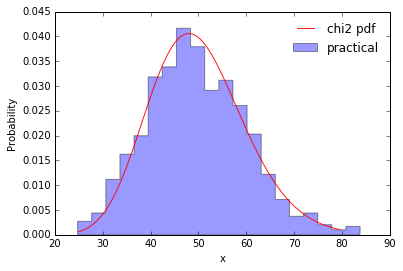

In [2]:
df = 50 # количество степеней свободы

# сгенерируем выборку из 1000 элементов и построим гистограмму
r = chi2.rvs(df, size=1000)
plt.hist(r, 20, normed=True, histtype='stepfilled', alpha=0.4, label='practical')

# теперь постороим теоретическую функцию плотности вероятности поверх начального графика
x = np.arange(25.,80.,0.5)
plt.plot(x, chi2.pdf(x, df),'r', alpha=0.9, label='chi2 pdf')
plt.legend(loc='best', frameon=False)
plt.xlabel('x')
plt.ylabel('Probability')

Из графика видно, что получившаяся гистограмма относительно совпадает с функцией плотности вероятности нашего распределения. Такой результат мы и ожидали увидеть.

In [3]:
# создадим массив выборочных средних 3000 выборок размера 5,10,50 (по 1000 выборок для каждого размера)
size = [5,10,50]
sm = []
bins = np.arange(35.,65.,0.5)
for i in size:
    for _ in itertools.repeat(None, 1000):
        rv = chi2.rvs(df, size=i)
        sm.append(np.mean(rv))

Одним из свойств распределения является то, что его матожидание и дисперию очень легко подсчитать.
В общем виде __матожидание__ равняется $EX=k$,а __дисперсия__ $DX=2k$.<br>
В нашем случае $k=50$(задано самостоятельно) и, соответственно, __$EX=50$__ и __$DX=100$__.

В scipy.stats.norm распределение задается через $\mu$ и $\sigma$ поэтому мы считаем $\sqrt{DX/n}$, где n-размер выборки.

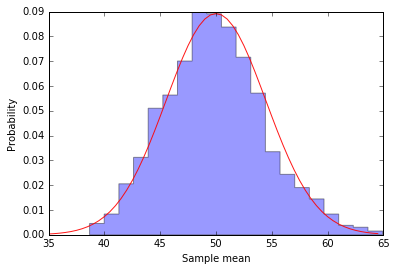

In [4]:
# построим гистограмму и график нормального распределения для выборки размера 5
plt.hist(sm[0:1000], 20, normed=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, df, np.sqrt(2*df/5.)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

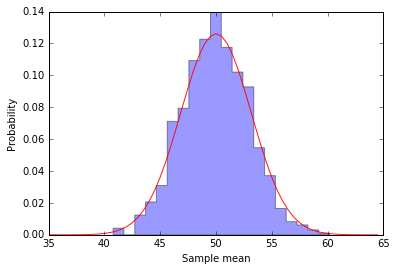

In [5]:
# построим гистограмму и график нормального распределения для выборки размера 10
plt.hist(sm[1000:2000], 20, normed=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, df, np.sqrt(2*df/10.)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

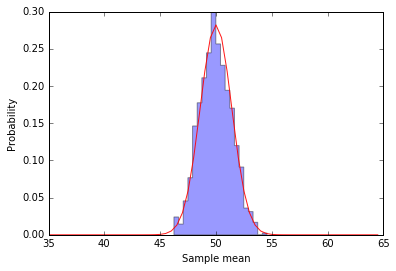

In [6]:
# построим гистограмму и график нормального распределения для выборки размера 50
plt.hist(sm[2000:3000], 20, normed=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, df, np.sqrt(2*df/50.)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

### Вывод
Мы показали, что осноные моменты центральной предельной теоремы выполняются:
Во-первых, гистограмму распределения можно описать нормальым распределением с параметрами $(EX,DX/n)$.<br>
Во-вторых, заметно, что при увеличении размера выборки гистограмма начинает точнее напоминать нормальное распределение, а также можно увидеть, что дисперсия понижается (это очевидно из формул, но на графиках получается нагляднее). 